In [5]:
%pip install qiskit==1.2.4
%pip install qiskit-aer==0.15.1
%pip install pylatexenc==2.10


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
from qiskit import QuantumCircuit
from qiskit.converters import circuit_to_gate
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Operator
from qiskit.quantum_info import Statevector
from qiskit import transpile 
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit import ControlledGate
import math 
from math import sqrt

#Here makes custom H gate to practice making gates 

H = Operator([
    [1/sqrt(2),1/sqrt(2)],
    [1/sqrt(2),-1/sqrt(2)]
])

circuit = QuantumCircuit(1,1) 
circuit.append(H,[0])






#circuit.measure(range(1),range(1))
circuit.draw()


state = Statevector.from_int(0, 2)
state = state.evolve(circuit)
state.draw("latex")

<IPython.core.display.Latex object>

In [50]:
#3
#2

import numpy as np
import random
from math import sqrt



#Unitary operator to create state of 1/sqrt(3)|0> + sqrt(2)/sqrt(3)|1>
random_bit = [
    [1/sqrt(3),sqrt(2)/sqrt(3)],
    [sqrt(2)/sqrt(3),-1/sqrt(3)]
]
random_bit_transform = Operator(random_bit) 



backend = BasicSimulator()

def get_random_choice():
    #get |0> or |1> with 1/3 and 2/3 probabilty respectivley
    choice = 0
    circuit = QuantumCircuit(1,1) 
    circuit.append(random_bit_transform,[0])
    circuit.measure(range(1),range(1))
    

    qc_compiled = transpile(circuit, backend)

    job_sim = backend.run(qc_compiled, shots=1)
    result_sim = job_sim.result()

    counts = result_sim.get_counts(qc_compiled)
    observation = int(list(counts.items())[0][0])

    if observation == 1:
        #if result of first measurement is |1> then we again make a measurement with probabilites 1/2 and map the result to 1 or 2  
        circuit2 = QuantumCircuit(1,1) 
        circuit2.h(0)
        circuit2.measure(range(1),range(1))
        qc_compiled2 = transpile(circuit2, backend)

        job_sim2 = backend.run(qc_compiled2, shots=1)
        result_sim2 = job_sim2.result()

        counts2 = result_sim2.get_counts(qc_compiled2)
        observation2 = int(list(counts2.items())[0][0])
        if observation2 == 0:
            choice = 1
        else:
            choice = 2
    else:
        choice = observation
        
    return choice
    


{0: 646, 1: 670, 2: 684}


010


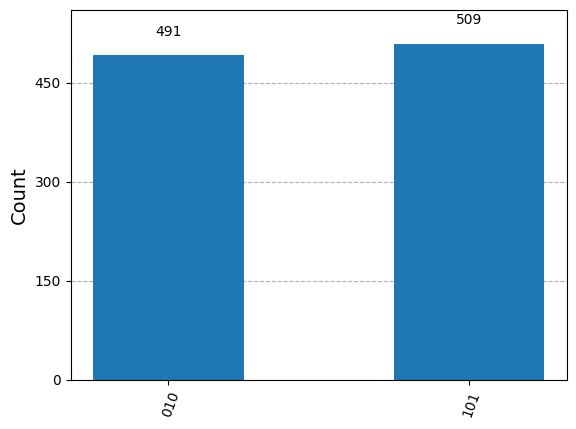

In [51]:
from qiskit import QuantumCircuit
from qiskit.converters import circuit_to_gate
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Operator
from qiskit.quantum_info import Statevector
from qiskit import transpile 
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit import ControlledGate
import math 
from math import sqrt


backend = BasicSimulator()

N = 100 # key length 
root2 = math.sqrt(2)
denom1 = math.sqrt(4 + 2*root2)
denom2 = math.sqrt(4 - 2*root2)

Z_transform_matrix = [
    [1,0],
    [0,1]
]
Z_transform = Operator(Z_transform_matrix)

X_transform_matrix = [
    [1/sqrt(2),1/sqrt(2)],
    [1/sqrt(2),-1/sqrt(2)]
]
X_transform = Operator(X_transform_matrix) 

W_transform_matrix = [ [ -1 / denom1 , (1 + root2) / denom1 ],
                        [  1 / denom2 , (root2 - 1) / denom2 ] ]
W_transform = Operator(W_transform_matrix) 


V_transform_matrix = [ [  1 / denom1 , (1 + root2) / denom1 ],
                        [ -1 / denom2 , (root2 - 1) / denom2 ] ]
V_transform = Operator(V_transform_matrix)

A_basis = [X_transform,W_transform,Z_transform]
B_basis = [W_transform,Z_transform,V_transform]

A_basis_choices = []
B_basis_choices = []

A_bits = []
B_bits = []


iterations = int(N*9/2)

basis_output_dict = {}


#loop through iterations
for i in range(iterations):
    A_i = get_random_choice()  # Generates 0, 1, or 2
    B_i = get_random_choice()

    #store the bases alice and bob chose 
    A_basis_choices.append(A_i)
    B_basis_choices.append(B_i)

    
    #make basis pair for when we count probabilites
    pair = A_i,B_i
    if pair not in basis_output_dict:
        basis_output_dict[pair] = {}
    
    #construct cicuit 
    circuit = QuantumCircuit(2,2) 
    circuit.h(0) 
    circuit.cx(0,1) 
    circuit.x(1)
    circuit.z(1)
    
    #applu unitary operator on alice and bobs bits depending on which basis they choose to measure in 
    if A_basis[A_i] != Z_transform:
        circuit.unitary(A_basis[A_i],[0])
    
    if B_basis[B_i] != Z_transform:
        circuit.unitary(B_basis[B_i],[1])

    circuit.measure([0,1],[0,1])
   
    #simulate circuit and store results along with the basis pairing 
    qc_compiled = transpile(circuit, backend)
    job_sim = backend.run(qc_compiled, shots=1)
    result_sim = job_sim.result()
    counts = result_sim.get_counts(qc_compiled)
    observation = list(counts.items())[0][0]

    #store alices and bobs bits they observe 
    A_bits.append(observation[1])
    B_bits.append(observation[0])

    if observation in basis_output_dict[pair]:
        basis_output_dict[pair][observation] = basis_output_dict[pair][observation] + 1
    else:
        basis_output_dict[pair][observation] = 1

print(basis_output_dict)
bXW  = basis_output_dict[(0,0)]
bXV = basis_output_dict[(0,2)]
bZW = basis_output_dict[(2,0)]
bZV = basis_output_dict[(2,2)]

#Invert bobs bits
B_bits = ["0"  if b == "1" else "1" for b in B_bits]


{(0, 1): {'10': 12, '01': 12, '11': 16, '00': 15}, (2, 2): {'00': 31, '10': 4, '01': 6, '11': 27}, (2, 1): {'10': 24, '01': 33}, (1, 1): {'11': 24, '00': 18, '10': 3, '01': 2}, (1, 2): {'01': 9, '11': 10, '10': 12, '00': 11}, (0, 2): {'01': 20, '10': 22, '00': 3, '11': 5}, (1, 0): {'01': 17, '10': 24}, (0, 0): {'00': 20, '11': 26, '10': 5, '01': 2}, (2, 0): {'11': 14, '10': 4, '00': 18, '01': 1}}


In [52]:
#Calculate results of simulation

def calc_E(count_dict):
    total = 0

    p00 = 0
    p11 = 0
    p01 = 0
    p10 = 0 
    
    for k in count_dict:
        total = total + count_dict[k]    

    if '00' in count_dict:
        p00 = count_dict['00']/total
    if '11' in count_dict:
        p11 = count_dict['11']/total
    if '01' in count_dict:
        p01 = count_dict['01']/total
    if '10' in count_dict:
        p10 = count_dict['10']/total
    
    return p00 + p11 -p01 - p10

#Calculate S value 
S = abs(calc_E(bXW) - calc_E(bXV) + calc_E(bZW) + calc_E(bZV))




#Construct key array based on if alice and bob chose the same basis
B_key = []
A_key = []

for i,b in enumerate(A_basis_choices):
    #they are the same when A_i = 1 ,B_i = 0 and A_i= 2,B_i = 1

    if A_basis_choices[i] == 1 and B_basis_choices[i] == 0 or A_basis_choices[i] == 2 and B_basis_choices[i] == 1:
        B_key.append(B_bits[i])
        A_key.append(A_bits[i])
        
print(f"S value for this simulation us {S}")
print(f"difference between S value and 2 sqrt(2) is {S-(2*sqrt(2))}")

print(f"length of key produced is {len(A_key)}")
print(f"Alice and Bob have the same key is {A_key == B_key}")

print(A_key)
print(B_key)

S value for this simulation us 2.8514611392746803
difference between S value and 2 sqrt(2) is 0.023034014528489966
length of key produced is 98
Alice and Bob have the same key is True
['0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0']
['0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1',